The purpose of this notebook is to analyze the COVID-19 data from Google. The main focus of this analysis would be placed on 2 countries: China and Ghana.
I would liek to establish:
1. The popuplation of the 2 countries
2a. The GDP of the 2 countries
2b. The GDP per Capita of the 2 countries
3. The number of infected persons over time for the 2 countries
4. The number of confirmed deaths over time
5. The age group that recorded the most deaths

In [1]:
import json
import pandas as pd
import numpy as np
from os import getcwd
import matplotlib.pyplot as plt
from os.path import isfile,join


In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Retrieve column headers of source file
DF_head = pd.read_csv(join(getcwd(), 'aggregated.csv'), nrows=3)
DF_cols = list(DF_head.columns)
DF_cols
del DF_head

In [ ]:
# Create DF for extract from source file
working_DF = pd.DataFrame(columns=DF_cols)
working_DF

In [ ]:
# Read from 20GB dataset in batches/chunks
chunck_DF = pd.read_csv(join(getcwd(), 'aggregated.csv'), iterator=True, chunksize=3000)
for step_DF in chunck_DF:
    working_DF = pd.concat([working_DF, step_DF[step_DF['country_name'].isin(['Ghana','China'])]], ignore_index=True,)


In [3]:
# working_DF.to_csv('working-DF.csv', index=False)
working_DF = pd.read_csv('working-DF.csv')

C:\Users\Anthony Ankrah\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3135: DtypeWarning: Columns (4,95,96) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 4000


In [60]:
working_DF.isna().sum()


location_key                                                   0
date                                                           0
place_id                                                     991
wikidata_id                                                    0
datacommons_id                                             30721
country_code                                                   0
country_name                                                   0
iso_3166_1_alpha_2                                             0
iso_3166_1_alpha_3                                             0
aggregation_level                                              0
new_confirmed                                              18155
new_deceased                                               18155
cumulative_confirmed                                       18124
cumulative_deceased                                        18124
cumulative_tested                                          32179
new_persons_vaccinated   

In [61]:
working_DF.shape


(32703, 708)

In [63]:
working_DF.dropna(axis=1, how='all', inplace=True)

In [64]:
working_DF.shape


(32703, 99)

In [65]:
working_DF.isna().sum()


location_key                                 0
date                                         0
place_id                                   991
wikidata_id                                  0
datacommons_id                           30721
country_code                                 0
country_name                                 0
iso_3166_1_alpha_2                           0
iso_3166_1_alpha_3                           0
aggregation_level                            0
new_confirmed                            18155
new_deceased                             18155
cumulative_confirmed                     18124
cumulative_deceased                      18124
cumulative_tested                        32179
new_persons_vaccinated                   32191
cumulative_persons_vaccinated            32615
new_persons_fully_vaccinated             32268
cumulative_persons_fully_vaccinated      32614
new_vaccine_doses_administered           32099
cumulative_vaccine_doses_administered    32102
population   

In [8]:
working_DF.date = pd.to_datetime(working_DF.date)

In [4]:
# population = working_DF.groupby('country_name')['population'].agg(['first','last']).style.format({'first':'{:,d}','last':'{:,d}'})
# population = working_DF.groupby('country_name')['population']
population = working_DF.groupby('country_name')['population'].agg(['first','last'])
population

,first,last
country_name,,
China,1439323774,64567588
Ghana,31072945,31072945


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234053EB6D0>,
      dtype=object)

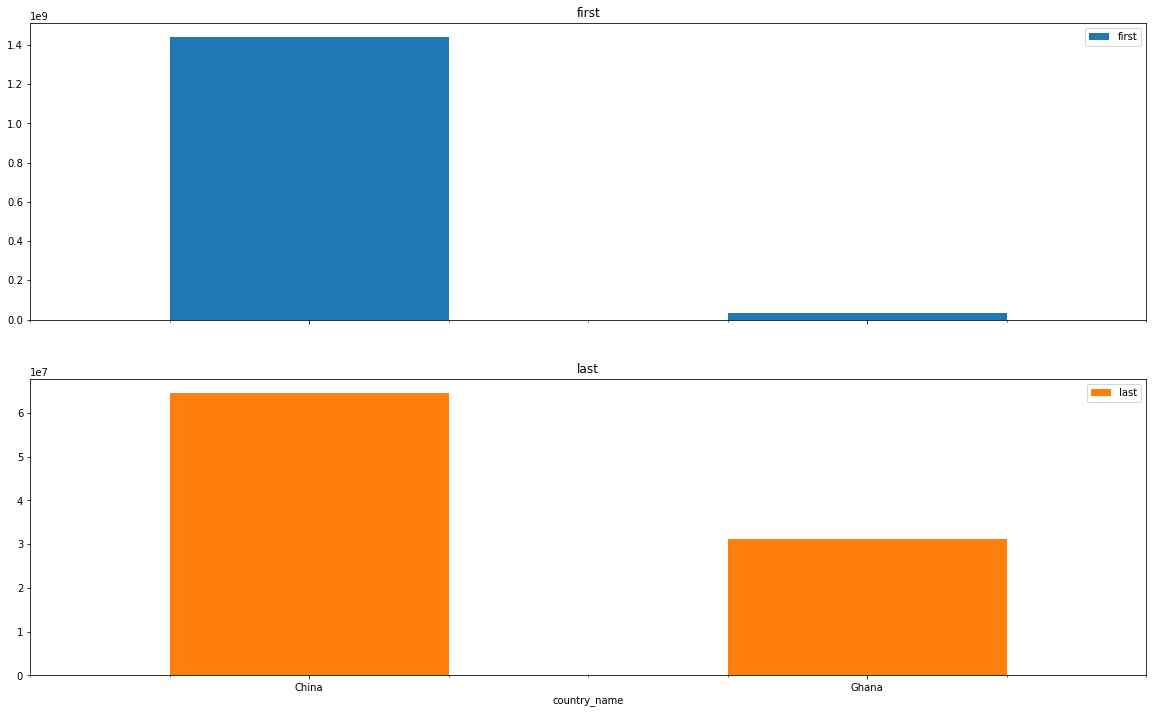

In [5]:
population.plot.bar(y=['first', 'last'], rot=0, subplots=True, figsize=(20,12))

In [12]:
gdp = working_DF.groupby('country_name')['gdp_usd'].agg(['first','last'])
gdp


,first,last
country_name,,
China,"14,342,902,842,915.00","6,461,330,000,000.00"
Ghana,"66,983,634,223.00","66,983,634,223.00"


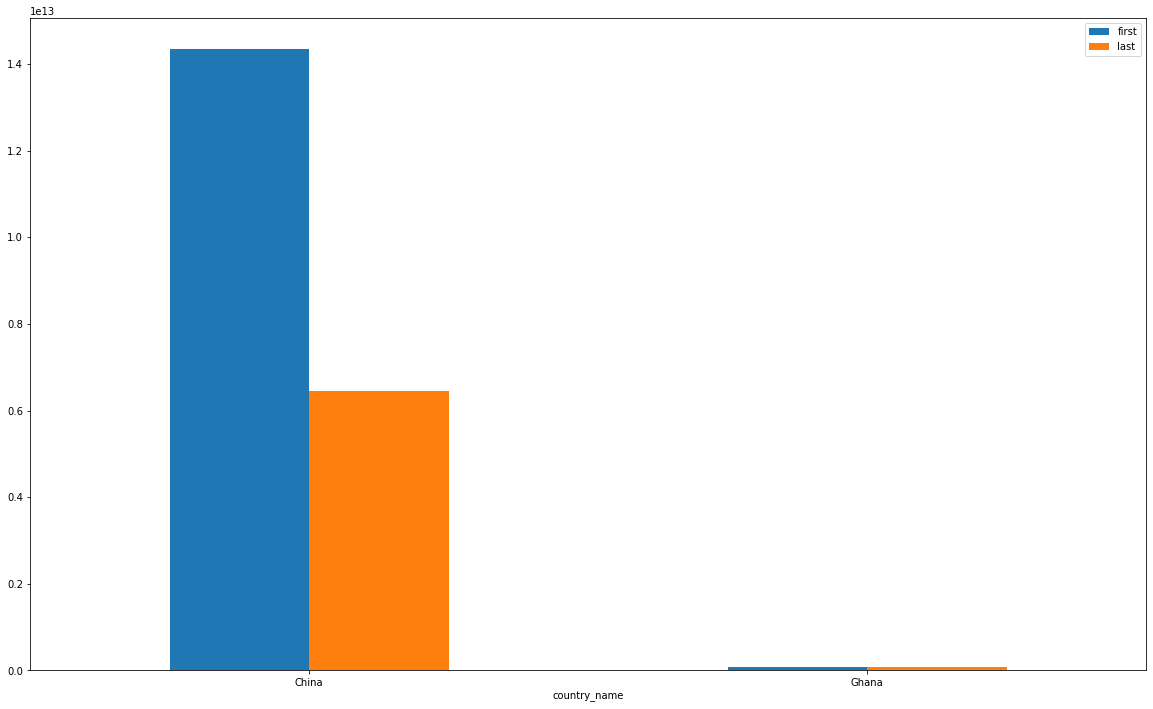

In [23]:
gdp.plot.bar(y=['first', 'last'], use_index=True, rot=0, figsize=(20,12))


In [24]:
gdp_capita = working_DF.groupby('country_name')['gdp_per_capita_usd'].agg(['first', 'last'])
gdp_capita


,first,last
country_name,,
China,"10,261.00","10,261.00"
Ghana,"2,202.00","2,202.00"


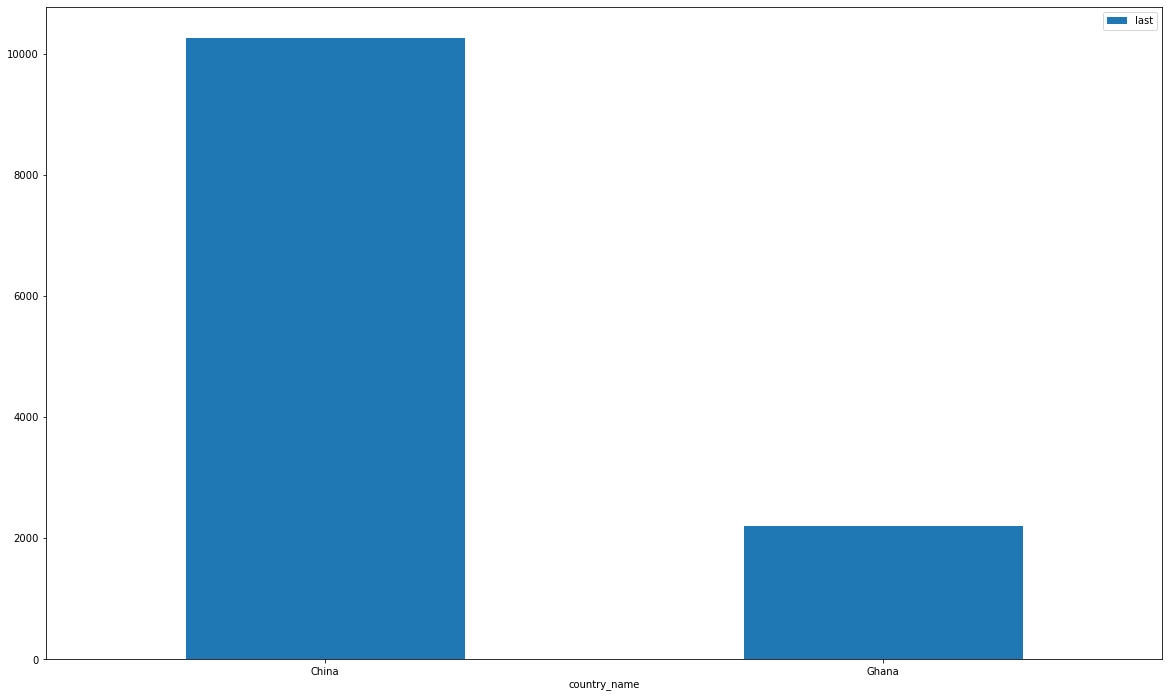

In [26]:
gdp_capita.plot.bar(y=['last'], use_index=True, rot=0, figsize=(20,12))


In [27]:
population_density = working_DF.groupby('country_name')['population_density'].agg(['first', 'last'])
population_density

,first,last
country_name,,
China,153.31,153.31
Ghana,136.56,136.56


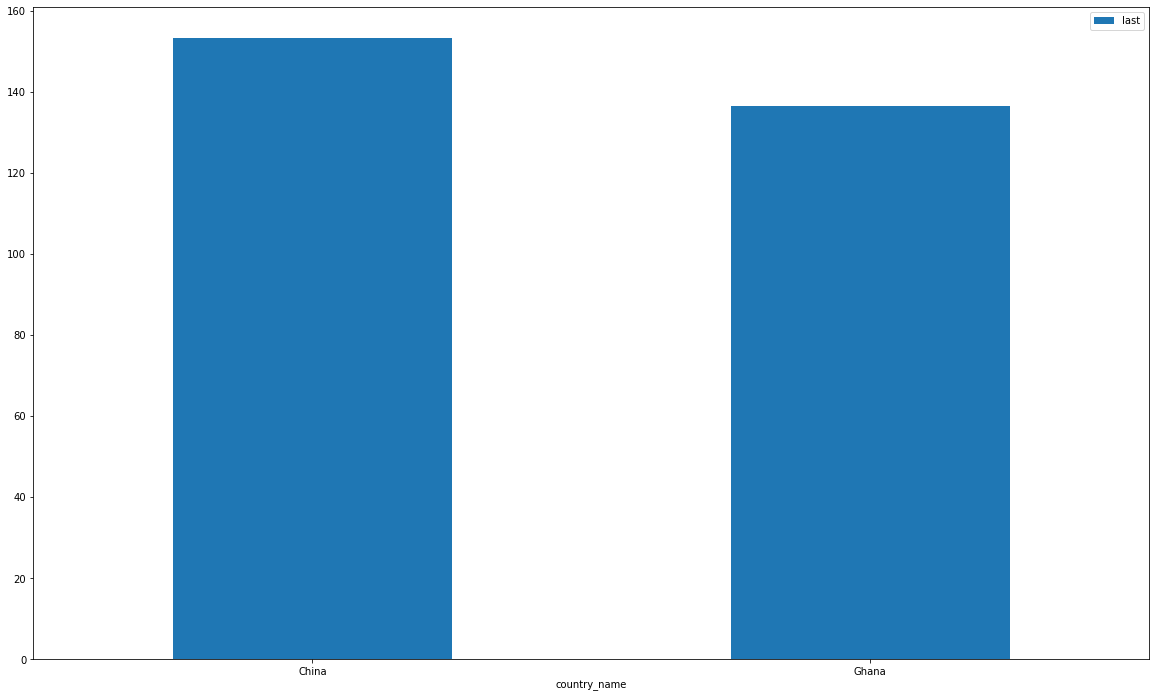

In [28]:
population_density.plot.bar(y=['last'], use_index=True, rot=0, figsize=(20,12))

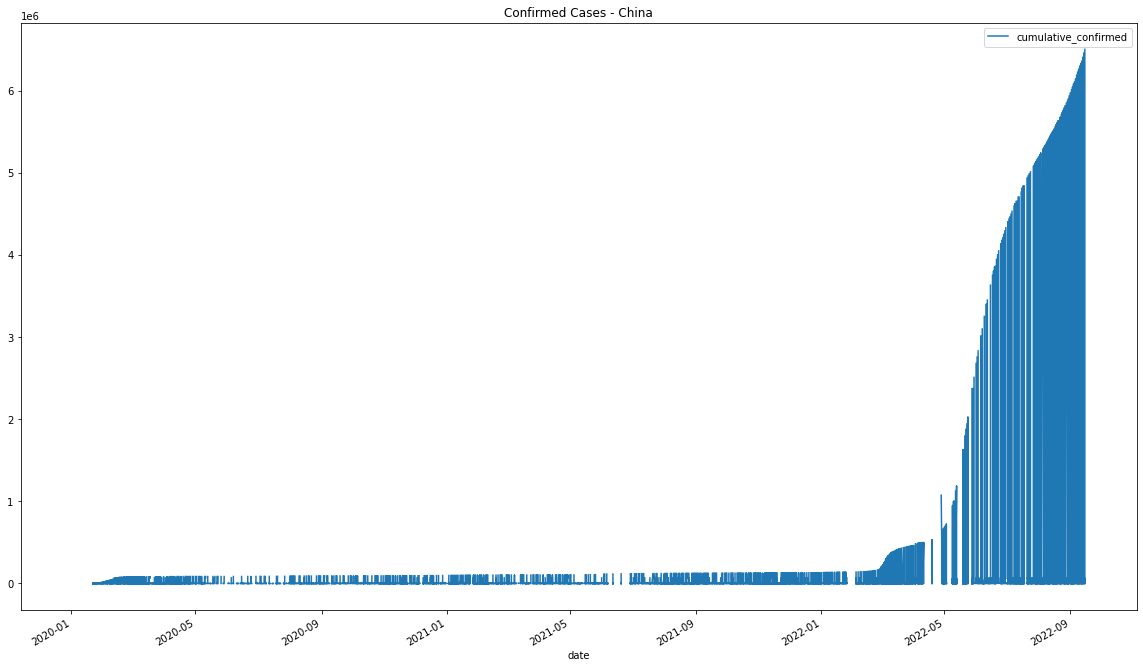

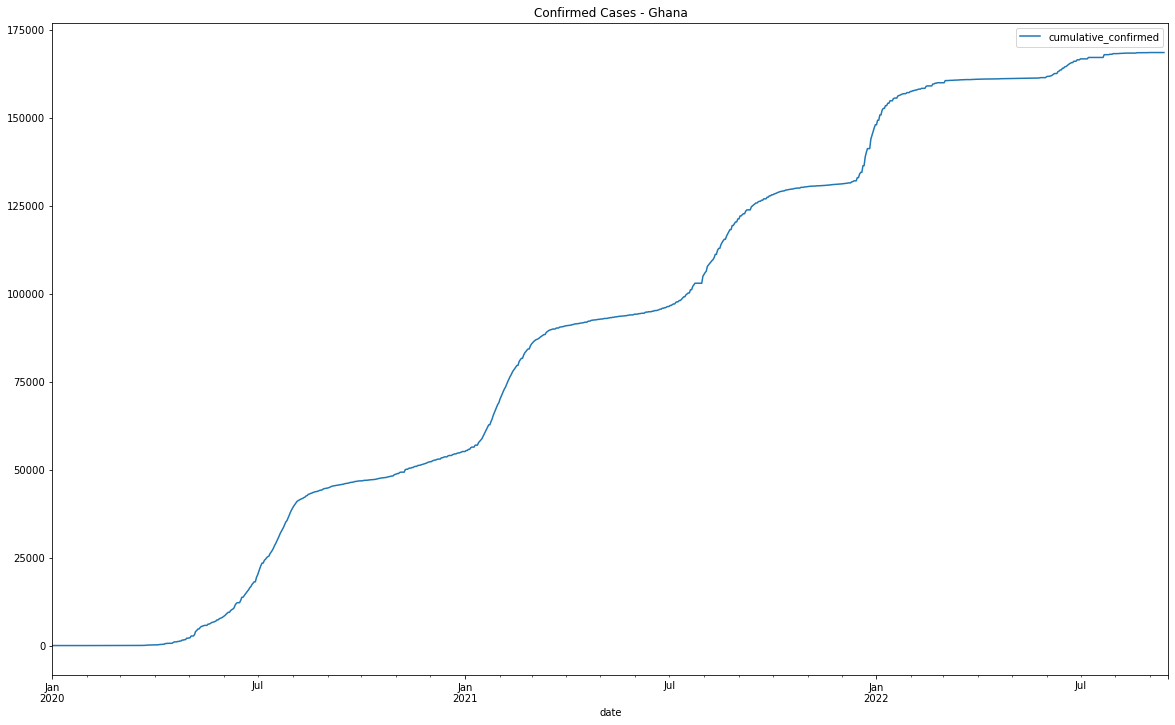

In [29]:
# Number of confirmed cases over the 2-year period
working_DF[working_DF['country_name'] == 'China'].plot(x='date', y='cumulative_confirmed', title='Confirmed Cases - China', figsize=(20,12))
working_DF[working_DF['country_name'] == 'Ghana'].plot(x='date', y='cumulative_confirmed', title='Confirmed Cases - Ghana', figsize=(20,12))


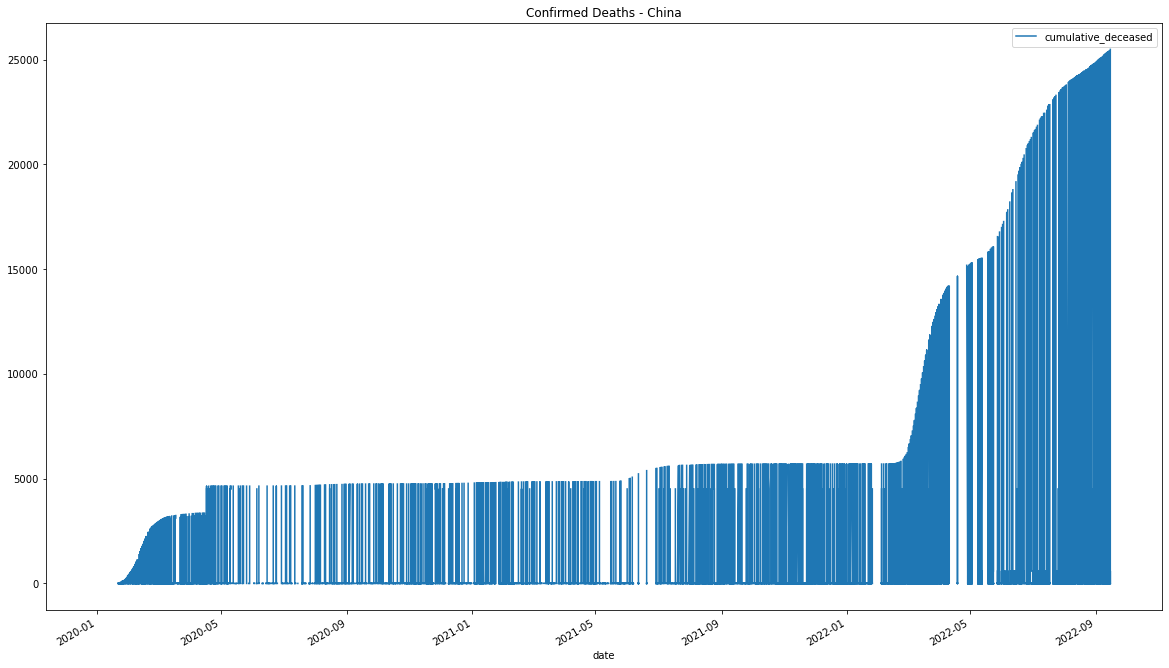

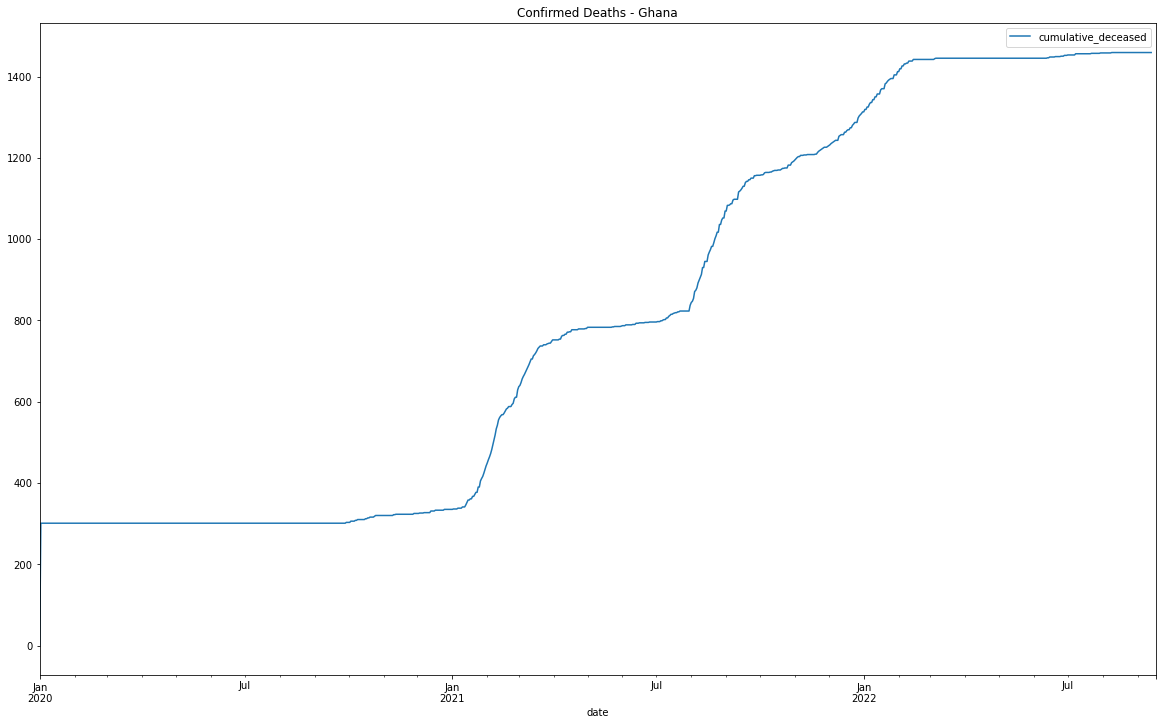

In [9]:
# Number of confirmed deaths over the 2-year period
working_DF[working_DF['country_name'] == 'China'].plot(x='date', y='cumulative_deceased', title='Confirmed Deaths - China', figsize=(20,12))
working_DF[working_DF['country_name'] == 'Ghana'].plot(x='date', y='cumulative_deceased', title='Confirmed Deaths - Ghana', figsize=(20,12))


In [71]:
new_recovered = working_DF.groupby('country_name')['new_recovered'].agg(['first', 'last'])
new_recovered

,first,last
country_name,,
China,923.00,1.00
Ghana,nan,nan


In [68]:
cumulative_recovered = working_DF.groupby('country_name')['cumulative_recovered'].agg(['first', 'last'])
cumulative_recovered


,first,last
country_name,,
China,"67,876.00","3,378.00"
Ghana,nan,nan


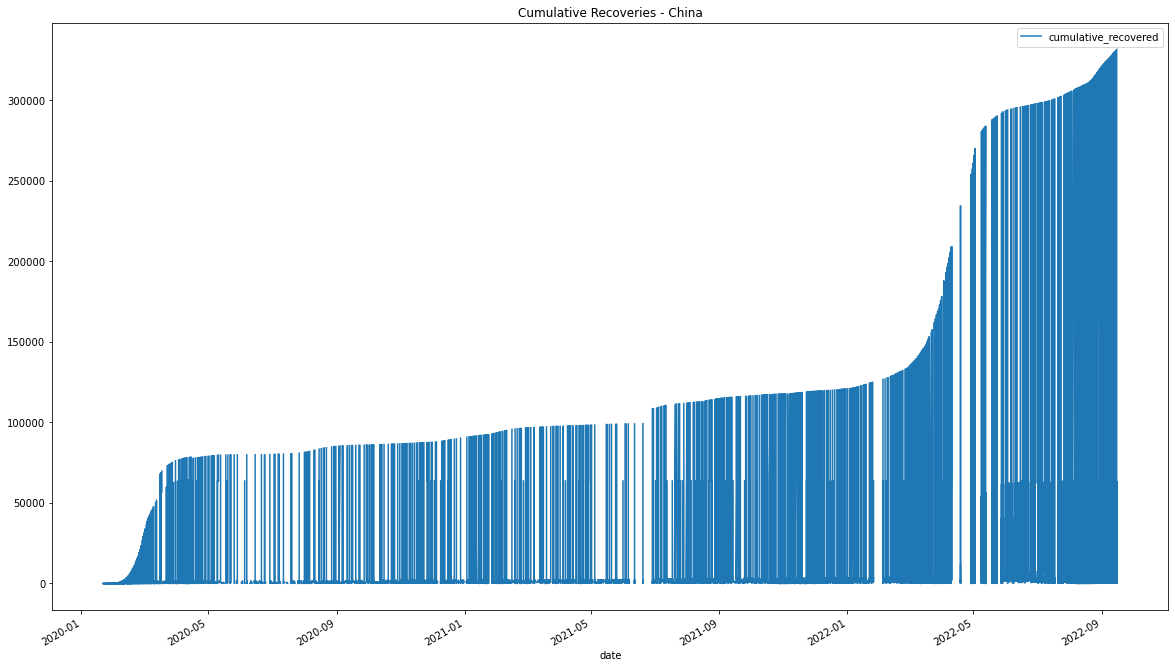

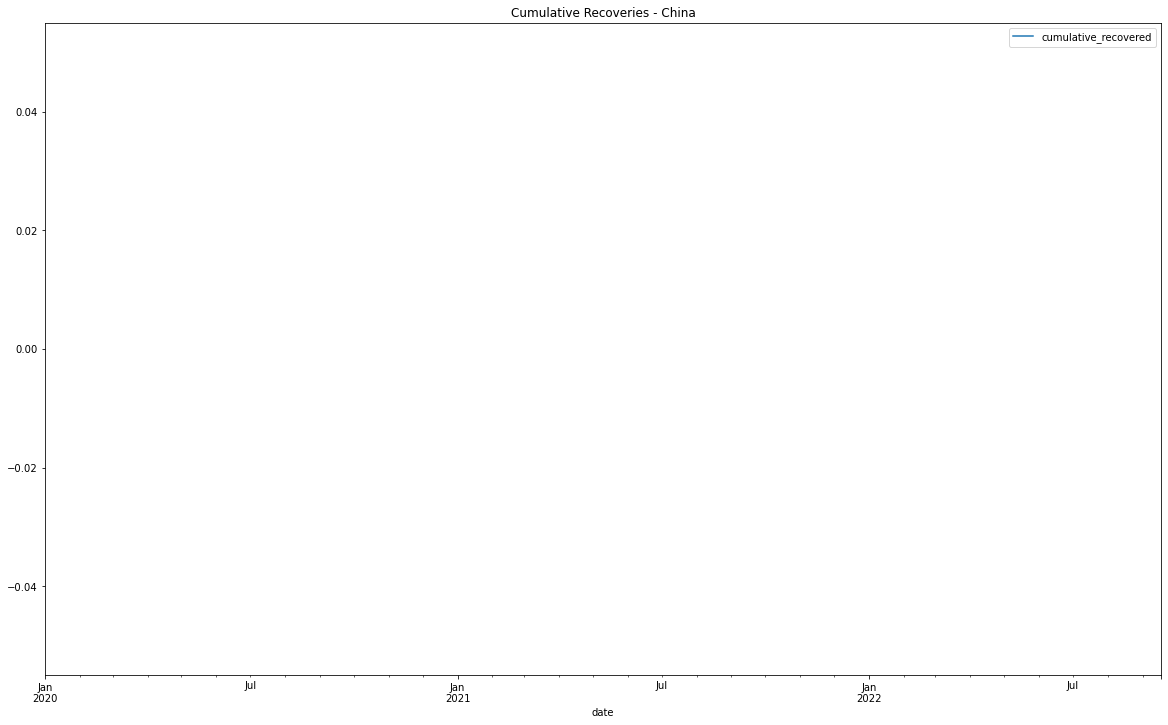

In [70]:
working_DF[working_DF['country_name'] == 'China'].plot(x='date', y='cumulative_recovered', title='Cumulative Recoveries - China', figsize=(20,12))
working_DF[working_DF['country_name'] == 'Ghana'].plot(x='date', y='cumulative_recovered', title='Cumulative Recoveries - China', figsize=(20,12))